# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Моя задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df.info()
display(df.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


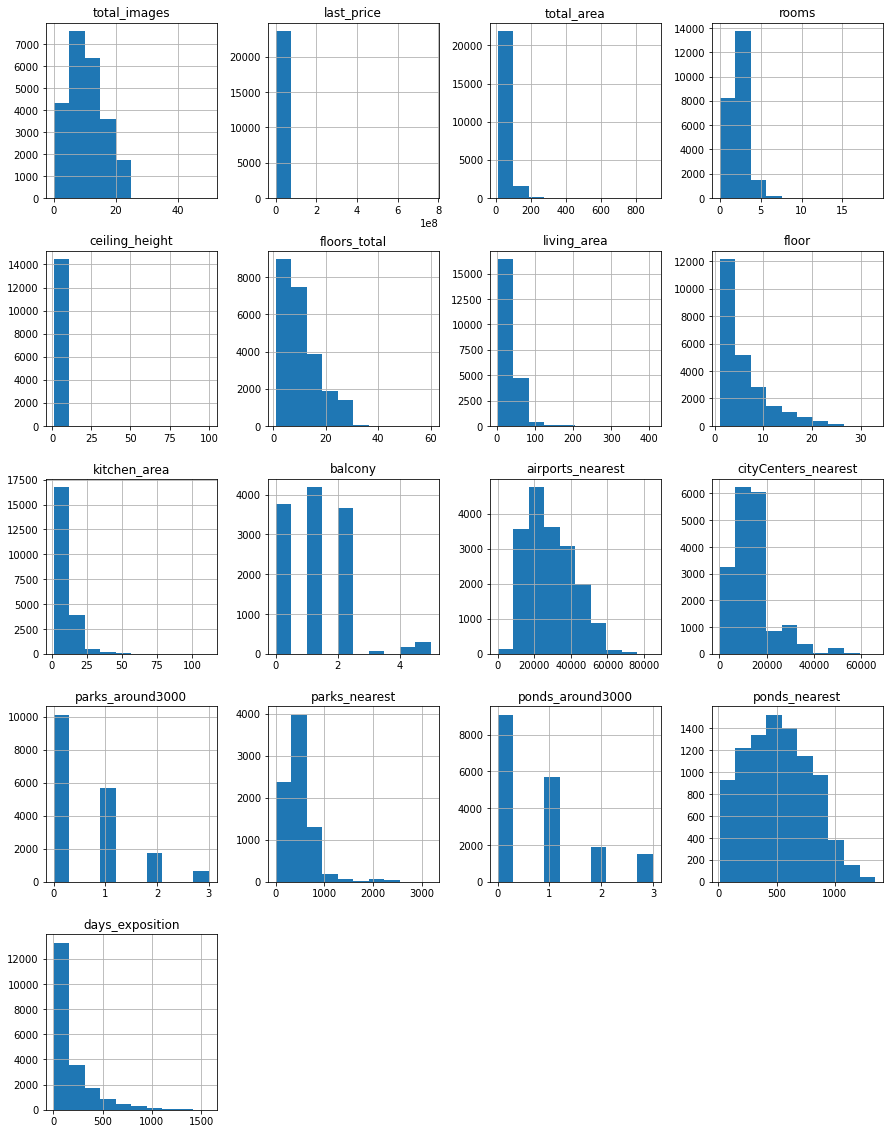

In [4]:
df.hist(figsize=(15, 20));

<div style="border:solid green 2px; padding: 20px">
Здесь видно что таблица имеет разные типы данных, имеются не явные дубликаты, следует привести все к единому "стандарту" для работы с ней. В столбцах наблюдаются пропущенные значения, надо что-то с этим всем делать, мне страшно :)
    
    Гистограммы пока особо не несут полезной информации (для меня по крайней мере), графики наверняка отличаются от 
    истины потому что датафрейм необходимо привести в порядок, только тогда график будет информативным. 

### Предобработка данных

In [5]:
df.isna().sum() # В 14 столбцах есть пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="border:solid green 2px; padding: 20px">
    В столбцах floors_total, locality_name я вижу относительно малое количество пропусков, поэтому их целесообразно просто оставить так как есть...
    
    Для этого я рассчитаю процентное соотношение пропусков и выведу их на экран.

In [6]:
for col in df.columns:
    print(f'{col}:{df[col].isna().sum() / df.shape[0]*100:.2f}%')

total_images:0.00%
last_price:0.00%
total_area:0.00%
first_day_exposition:0.00%
rooms:0.00%
ceiling_height:38.80%
floors_total:0.36%
living_area:8.03%
floor:0.00%
is_apartment:88.29%
studio:0.00%
open_plan:0.00%
kitchen_area:9.61%
balcony:48.61%
locality_name:0.21%
airports_nearest:23.38%
cityCenters_nearest:23.29%
parks_around3000:23.28%
parks_nearest:65.91%
ponds_around3000:23.28%
ponds_nearest:61.56%
days_exposition:13.42%


<div style="border:solid green 2px; padding: 20px">
Получив процентное соотношение пропусков, оцениваю пропуски в столбцах floors_total и locality_name не значительными, потому вообще ничего с ними можно не делать, т.к. роли это не сыграет.

In [7]:
# Для удобства приводим названия в нижний регистр, удаляем явные дубликаты, и не явные дубликаты.
#df['locality_name'].value_counts()
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'] =  df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].str.replace('городского типа','')

#Необходимы целые числа в столбце с этажами. (все-таки придется удалить пропуски)
df.dropna(subset=['floors_total'], inplace=True)
df['floors_total'] = df['floors_total'].astype('int')

# Ставлю маркер 0 в пропусках, и привожу к целому числу
df['balcony'] = df['balcony'].fillna(value=0).astype('int')
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype('int')
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype('int')
df['days_exposition'] = df['days_exposition'].fillna(value=9999).astype('int')

#Заполняю пропуски средним значением в жил площади и на кухне
living = df['living_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living * df['total_area'], inplace=True)

kitchen = df['kitchen_area'].mean() / df['total_area'].mean()
df['kitchen_area'].fillna(kitchen * df['total_area'], inplace=True)

#df.isna().sum()

#Стоимость в целых значениях
df['last_price'] = df['last_price'].astype('int')
#Аномально низкие значения надо заменить


#Некорректный формат даты приводим в человеческий вид
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
#df['first_day_exposition'].head()

# Высоту потолков тоже стоит заполнить медианой, для информативности будущих графиков
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

#
df['is_apartment'] = df['is_apartment'].fillna(False)

#df.isna().sum()
#df.head()

#Переименую 'cityCenters_nearest', потому что выбивается из общего вида
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

df.head()
#df.isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,9999
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,False,False,27.836861,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121


AxesSubplot(0.125,0.125;0.775x0.755)
График указывает, что значения больше 5 и меньше 0 являются аномальными, и их нужно отбросить.


<AxesSubplot:>

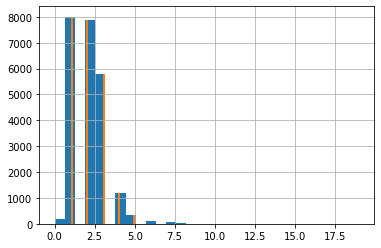

In [8]:
#Убираем аномальные значения в last_price
df = df[df['last_price'] > 13000]

#Заполняем средним значения в total_area
for area in df['total_area'].unique():
    df.loc[(df['total_area'] == area)&(df['living_area'].isna()), 'living_area'] = \
    df['total_area'] * (df['living_area'].mean())/(df['total_area'].mean())

#В rooms есть аномально высокое количество комнат
df['rooms'].unique()
print(df['rooms'].hist(bins=30));
print('График указывает, что значения больше 5 и меньше 0 являются аномальными, и их нужно отбросить.')

df = df.loc[(df['rooms'] > 0)&(df['rooms'] < 6)]
df['rooms'].unique()
df['rooms'].hist(bins=30)
#df['rooms'].describe()

<div style="border:solid green 2px; padding: 20px">
По запросу в гугл, обычная квартира не может технически быть более 5 комнат, все что больше - либо объединенные с соседними, либо квартиры в несколько этажей (таунхаусы). Потому считаю логичным отфильтровать значения до 5 комнат.

count    23094.000000
mean         2.690507
std          0.199622
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

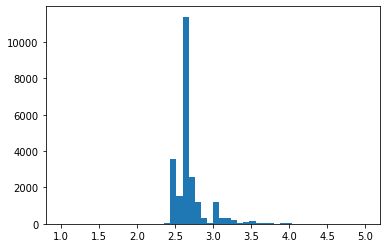

In [9]:
plt.hist(df['ceiling_height'], bins=50, range =(1,5));
df = df.loc[(df['ceiling_height'] > 2)&(df['ceiling_height'] <= 4)]
df['ceiling_height'].describe()

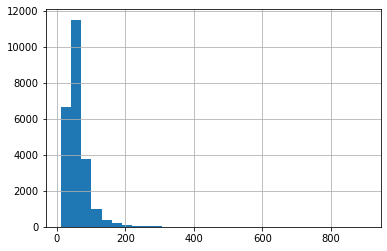

In [10]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);

### Посчитаем и добавим в таблицу новые столбцы

In [11]:
#Столбец со стоимостью кв метра
df['one_price'] = df['last_price'] / df['total_area']
df['one_price'] = df['one_price'].astype(int)

#Столбцы дня недели, месяца и года
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#Этаж
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)

#Расстояние до центра
df['city_centers'] = df['city_centers_nearest']/1000
df['city_centers'] = df['city_centers'].round(0)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_price,weekday,month,year,floor_type,city_centers
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,False,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,9999,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,False,False,False,11.000000,2,поселок шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,False,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,90.816648,9,False,False,False,27.836861,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,False,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

<div style="border:solid green 2px; padding: 20px">
    Теперь можно построить графики исходя из данных которые у нас получились на выходе

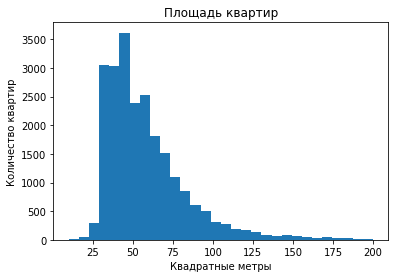

По графику видно, что основа всех объявлений - квартиры площадью от 30 до 60 кв метров. 
После наблюдается спад количества продаваемых квартир. Так же заметен пик на 50 кв метрах,
можно предположить что это самое интересное предложение для покупателя, ибо спрос рождает предложение.


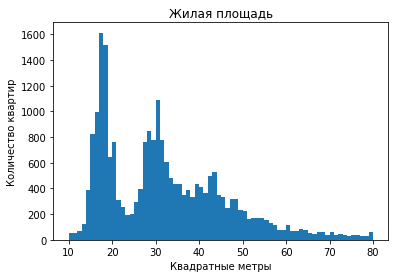

Значения жилплощади контрастируют относительно других в двух значениях, 18 и 32 кв м. 
Можно предположить, что это связано с привлекательной стоимостью студий 18 кв м, и однокомнатных 32 кв м.


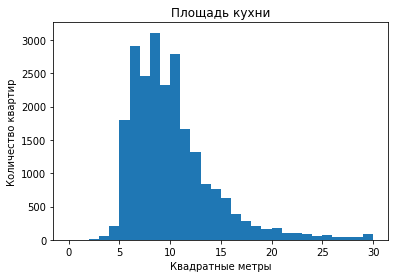

Наблюдается пик площади кухни в значении от 6 до 12 кв м.


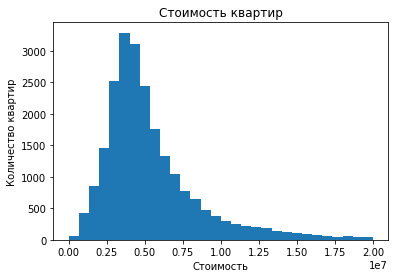

Стоимость квартир интересна от 2.5 до 6 миллионов рублей.


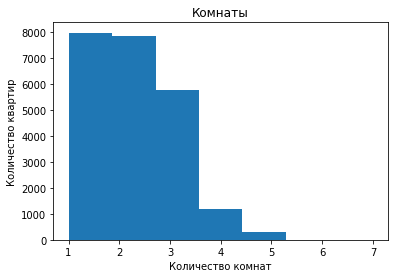

Преобладающее количество продаж выпадает на долю одной, двух, и трех комнатных квартир.


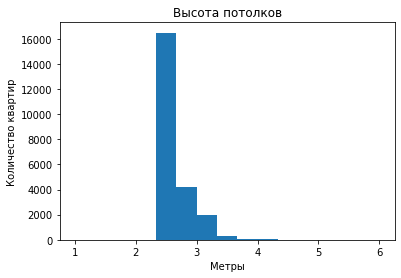

В подавляющем большинстве высота потолка не превышает 2,5 метров.


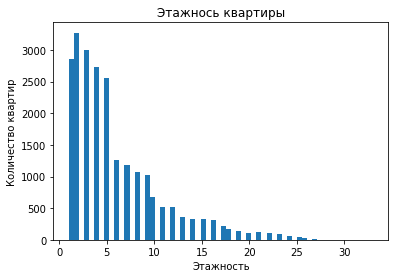

Основная доля продаж квартир выходит на этажность с первого по пятый. 
Затем наблюдается снижение спроса.


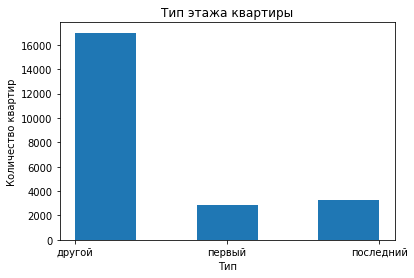

Большее количество покупателей предпочитают квартиры не на первом и не на последнем этажах.


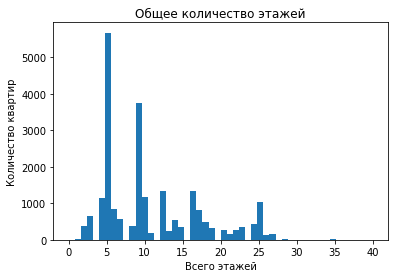

Подавляющее большинство квартир продаются в 5 этажных домах. Предполагаем что это вторичное жилье в старом жилом фонде.


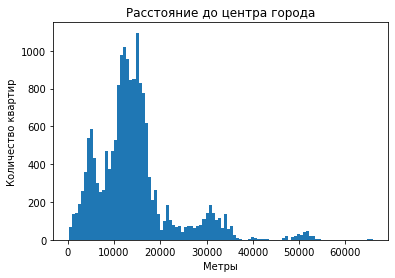

Акцентированное внимание стоит уделить пику от 10 до 20 километров. 
Такое расстояние до центра возможно связано с оптимальным соотношением цена/расстояние. 
Так же стоит обратить внимание на пик от 5 до 8 км от центра.


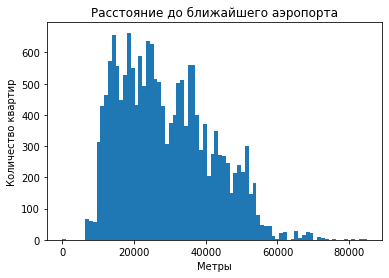

В целом, могу предположить что расстояние до аэропорта не имеет значения для большинства клиентов. 
Оно показано относительно ровным фоном от 10 до 40 км, предполагаю корелляцию этого значения с центром города.


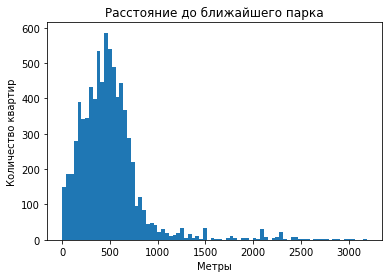

Судя по графику, парк в районе 500 метров от дома существенно влияет на продажу квартиры.


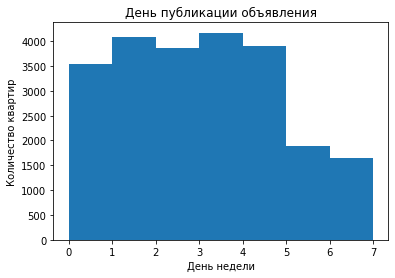

Большинство объявлений публикуются с понедельника по пятницу.


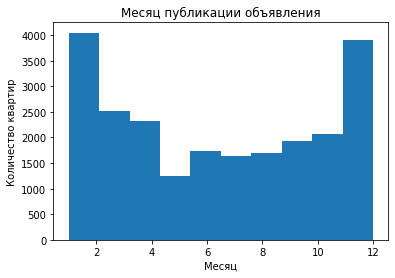

Декабрь и январь - сезон продаж. В апреле наблюдается просадка спроса. 
С мая по декабрь рост продаж, с января по апрель плавное падение.


In [12]:
#Площадь общая
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'По графику видно, что основа всех объявлений - квартиры площадью от 30 до 60 кв метров. \nПосле наблюдается спад количества продаваемых квартир. Так же заметен пик на 50 кв метрах,\nможно предположить что это самое интересное предложение для покупателя, ибо спрос рождает предложение.'
)

#Жилая площадь
plt.hist(df['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'Значения жилплощади контрастируют относительно других в двух значениях, 18 и 32 кв м. \nМожно предположить, что это связано с привлекательной стоимостью студий 18 кв м, и однокомнатных 32 кв м.'
)

#Площадь кухни
plt.hist(df['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'Наблюдается пик площади кухни в значении от 6 до 12 кв м.'
)

#Стоимость квартир
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print(
'Стоимость квартир интересна от 2.5 до 6 миллионов рублей.'
)

#Комнаты
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print(
'Преобладающее количество продаж выпадает на долю одной, двух, и трех комнатных квартир.'
)

#Высота потолка
plt.hist(df['ceiling_height'], bins=15, range =(1,6))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'В подавляющем большинстве высота потолка не превышает 2,5 метров.'
)

#Этаж
plt.hist(df['floor'], bins=60)
plt.title('Этажнось квартиры')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')
plt.show()
print(
'Основная доля продаж квартир выходит на этажность с первого по пятый. \nЗатем наблюдается снижение спроса.'
)

#Тип этажа квартиры
plt.hist(df['floor_type'], bins=5)
plt.title('Тип этажа квартиры')
plt.xlabel('Тип')
plt.ylabel('Количество квартир')
plt.show()
print(
'Большее количество покупателей предпочитают квартиры не на первом и не на последнем этажах.'
)

#Количество этажей
plt.hist(df['floors_total'], bins=50, range=(0,40))
plt.title('Общее количество этажей')
plt.xlabel('Всего этажей')
plt.ylabel('Количество квартир')
plt.show()
print(
'Подавляющее большинство квартир продаются в 5 этажных домах. Предполагаем что это вторичное жилье в старом жилом фонде.'
)

#Расстояние до центра
plt.hist(df['city_centers_nearest'], bins=100)
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'Акцентированное внимание стоит уделить пику от 10 до 20 километров. \nТакое расстояние до центра возможно связано с оптимальным соотношением цена/расстояние. \nТак же стоит обратить внимание на пик от 5 до 8 км от центра.'
)

#Расстояние до аэропорта
plt.hist(df['airports_nearest'], bins=80)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'В целом, могу предположить что расстояние до аэропорта не имеет значения для большинства клиентов. \nОно показано относительно ровным фоном от 10 до 40 км, предполагаю корелляцию этого значения с центром города.'
)

#Расстояние до парка
plt.hist(df['parks_nearest'], bins=80)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print(
'Судя по графику, парк в районе 500 метров от дома существенно влияет на продажу квартиры.'
)

#День публикации объявления
plt.hist(df['weekday'], bins=7,range=(0,7))
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
print(
'Большинство объявлений публикуются с понедельника по пятницу.'
)

#Месяц публикации объявления
plt.hist(df['month'], range=(1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
print(
'Декабрь и январь - сезон продаж. В апреле наблюдается просадка спроса. \nС мая по декабрь рост продаж, с января по апрель плавное падение.'
)

Время продажи (медиана): 95
Время продажи (среднее): 181


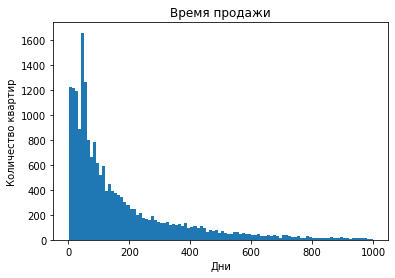

<Figure size 720x504 with 0 Axes>

count    20010.000000
mean       180.535382
std        219.316183
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [13]:
#
print('Время продажи (медиана):', round(df.query('days_exposition != 9999')['days_exposition'].median()))
print('Время продажи (среднее):', round(df.query('days_exposition != 9999')['days_exposition'].mean()))
plt.hist(df['days_exposition'], bins=100, range=(1,1000))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.figure(figsize=(10,7))
plt.show()
df.query('days_exposition != 9999')['days_exposition'].describe()

<div style="border:solid green 2px; padding: 20px">
    Вывод: Время продажи в медианном (95) значении сильно отличается от среднего(180). Большиное количество квартир продаются в первые дни после публикации. До 200 дней можно считать продажу быстрой, после - наблюдается спад статистики продаж, единичные случаи достигают срока продаж в несколько лет.

,last_price,one_price,total_area,rooms,city_centers
last_price,1.000000,0.772193,0.671853,0.351518,-0.243006
one_price,0.772193,1.000000,0.295647,0.022559,-0.332824
total_area,0.671853,0.295647,1.000000,0.740918,-0.228688
rooms,0.351518,0.022559,0.740918,1.000000,-0.163503
city_centers,-0.243006,-0.332824,-0.228688,-0.163503,1.000000


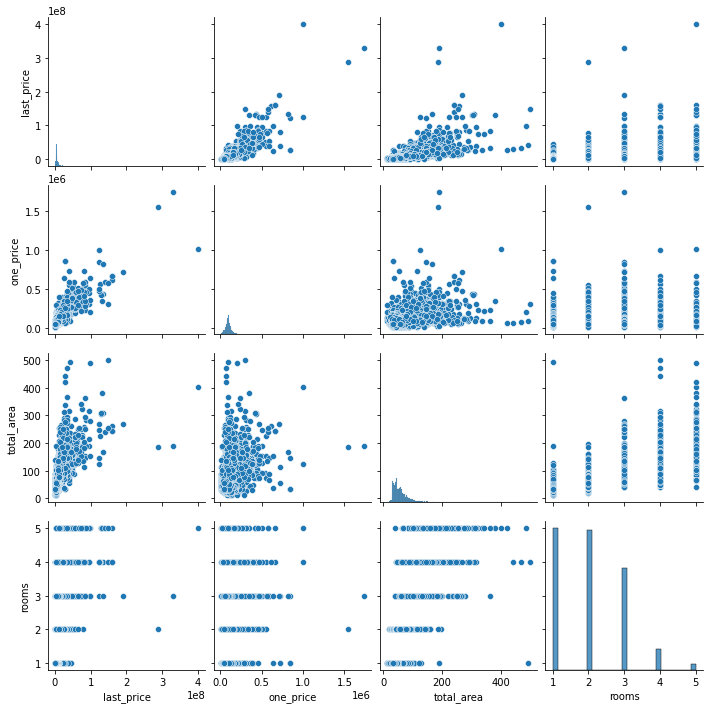

In [14]:
#Вместо того что я написал в тот раз, лучше построить матрицу корелляций.
sns.pairplot(df[['last_price', 'one_price', 'total_area', 'rooms']]);

#А так же вывести для наглядности сводную таблицу в цифрах
df[['last_price', 'one_price', 'total_area', 'rooms', 'city_centers']].corr()

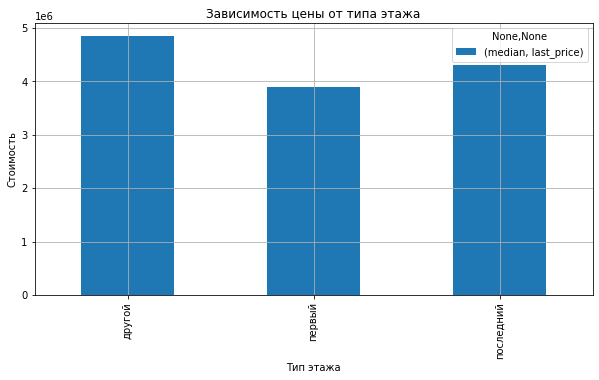

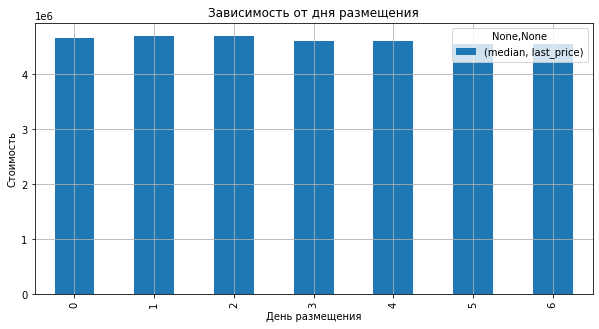

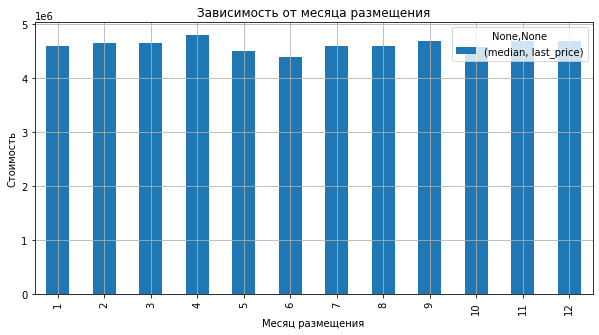

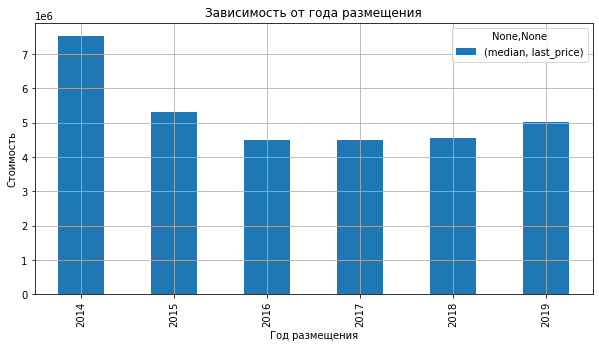

In [15]:
#Строим информативные таблицы методом pivot_table
#Зависимость цены от типа этажа
floors = df.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
floors.plot.bar(title ='Зависимость цены от типа этажа', xlabel='Тип этажа', ylabel='Стоимость', grid=True, figsize=(10, 5));

#Зависимость от дня размещения
weekday = df.pivot_table(index='weekday', values='last_price', aggfunc=['median'])
weekday.plot.bar(title ='Зависимость от дня размещения', xlabel='День размещения', ylabel='Стоимость', grid=True, figsize=(10, 5));

#Зависимость от месяца размещения
month = df.pivot_table(index='month', values='last_price', aggfunc=['median'])
month.plot.bar(title ='Зависимость от месяца размещения', xlabel='Месяц размещения', ylabel='Стоимость', grid=True, figsize=(10, 5));

#Зависимость от года размещения
year = df.pivot_table(index='year', values='last_price', aggfunc=['median'])
year.plot.bar(title ='Зависимость от года размещения', xlabel='Год размещения', ylabel='Стоимость', grid=True, figsize=(10, 5));

<div style="border:solid green 2px; padding: 20px">
    Я вижу незначительные изменения в таблице с днем и месяцем размещения, есть различия, но столь не значительные что брать их во внимание не целесообразно. А вот зависимость этажа влияет на стоимость. Заметно что первый этаж стоит дешевле нежели последний, и любой другой. Это подтверждает связь со снижением спроса на первый этаж у покупателей, при построении общего графика продаж.
    
    В 2014 году зафиксирована самая высокая стоимость квартир, плавно идущая на спад до 2016 года. С 2017 года наблюдается незначительный прирост стоимости. Год влияет на стоимость квартиры.

,one_price
locality_name,
санкт-петербург,114153.099346
пушкин,103152.863014
деревня кудрово,92296.749117
поселок парголово,90448.000000
поселок мурино,85066.228571
поселок шушары,78277.473563
колпино,75332.866469
гатчина,68757.225490
всеволожск,68633.592308


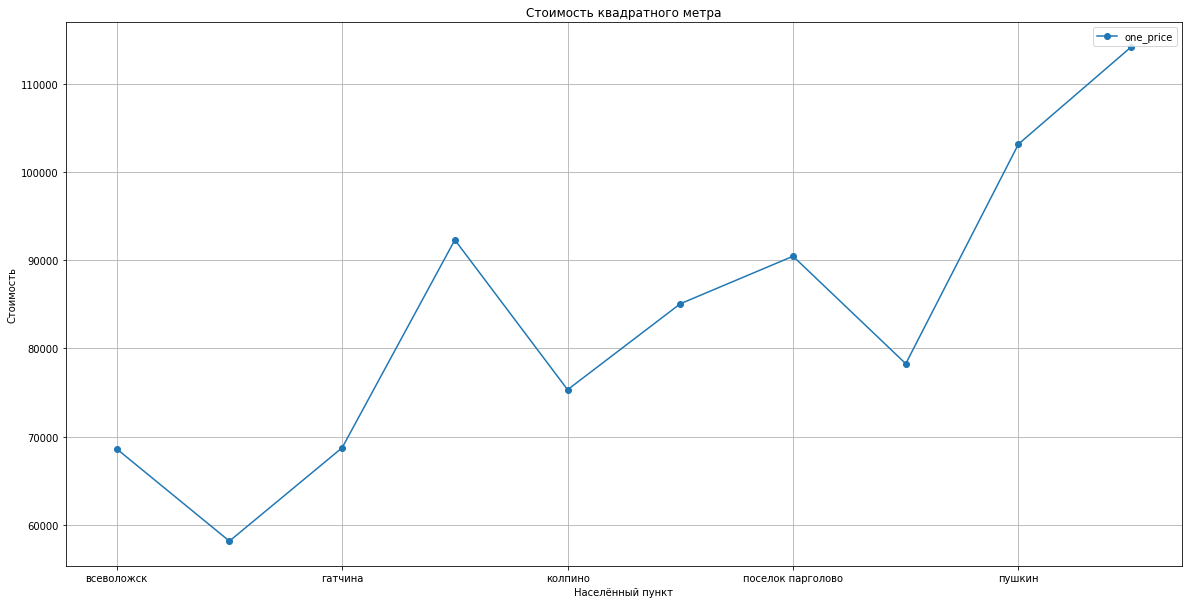

In [17]:
#Здесь можем вывести стоимость кв метра у населенных пунктов
local = df['locality_name'].value_counts().head(10)
local_one_price = df.query('locality_name in @local.index').pivot_table(values='one_price', index ='locality_name', aggfunc='mean')
display(local_one_price.sort_values('one_price', ascending=False))
local_one_price.plot(title ='Стоимость квадратного метра', xlabel = 'Населённый пункт',
          ylabel = 'Стоимость',grid=True, style='o-', figsize=(20, 10));

<div style="border:solid green 2px; padding: 20px">
Вывод: Стоимость кв метра напрямую зависит от расстояния до города. Чем дальше расположен населенный пункт от города - тем стоимость его ниже, в сводной таблице видно распределение стоимостей по убыванию от самой большой в СПб, до самой низкой в Выборге.
    

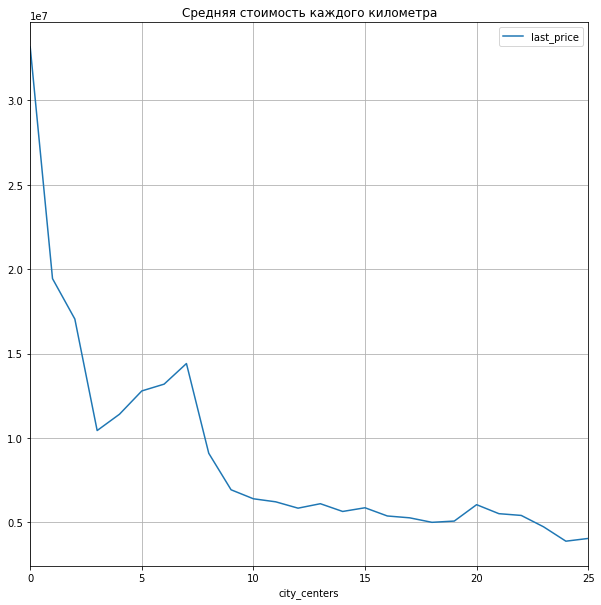

In [18]:
#Средняя стоимость каждого километра
(
    df.query('locality_name == "санкт-петербург"')
    .pivot_table(index='city_centers', values='last_price',aggfunc='mean')
    .plot(title ='Средняя стоимость каждого километра', grid=True, figsize=(10,10),xlim=(0,25))
);

<div style="border:solid green 2px; padding: 20px">
    Вывод: Центральной зоной является расстояние до 6км, затем на графике наблюдается значительное снижение стоимости

### Общий вывод

<div style="border:solid green 2px; padding: 20px">
<h3>Мы провели комплексное исследование:</h3>
    
    

    
 - **Обработали данные**  
просмотрели исходную таблицу оценив объем работы  
исключили пропуски  
устранили аномальные значения для точности результата  
избавились от явных и неявных дубликатов

    
 - **Привели к единому стандарту**  
    сделали единый регистр в названиях колонок и строк  
    привели значения к нужному типу  
    подписали таблицы для легкого визуального восприятия
    

    
 - **Отсортировали, создали новые колонки для удобства и понимания**  
    появились новые колонки с днем, месяцем, и годом продаж для понимания корелляции значений
    

    
 - **Сделали выводы на основе полученных результатов**  
    
    
    Вывели графики исходя из которых смогли сделать предположения, выдвинуть гипотезы для дальнейшей работы. Таким образом облегчили понимание информации, и сконцентрировали внимание на действительно важных событиях.
    
    Наглядно увидели корелляцию колонок между собой блягодаря сводной таблице и графику. Это позволило сопоставить значения и понять как данные взаимосвязаны.
    
    Мы подтвердили гипотезу о влиянии стоимости квартиры в зависимости от этажа. Таким образом подтвердилась информация графика с общим количеством продаж на снижение спроса для квартир находящихся на первом этаже. Так же узнали, что год влияет на стоимость квартир, и на данный момент наблюдается рост цены.
    
    Мы выяснили, что быстрой продажей является значение до 45 дней, в среднем квартиру продают в срок до 95 дней, а максимальное время продажи может достигать нескольких лет (1580 дней = ориентировочно 4.5 года).
    
    Средняя цена в 10 населенных пунктах была выстроена в порядке убывания. Таким образом мы знаем, что самой высокой стоимостью за кв метр площади равняется значение в Санкт-Петербурге (114431р), а самой низкой стоимостью выявлен Выборг (58142р)
    
    Выяснено, что самая высокая стоимость в Санкт-Петербурге держится на расстоянии около 8 км от центра города. Все что дальше - имеет тенденцию значительного снижения стоимости.